In [2]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# variable for file path from this directory
to_data = '../../../data/'

# EDA Continued

In this notebook I aim to further explore the data through visualisations of the features to discover possible relationships.

In [3]:
# import latest 
df = pd.read_csv(to_data + 'initial_clean_lc', index_col = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Target:  churn

Let's start by visualising our target variable, churn:

In [4]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

So we can see that a high percentage of our data is 'False' (do not churn).  We have a class imbalance issue and should investigate ways to fix this. 

In [5]:
df.churn.replace((True, False), (1, 0), inplace = True)

In [6]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Think about what the best way is to visualise a binary target variable.

Text(0, 0.5, 'Churn')

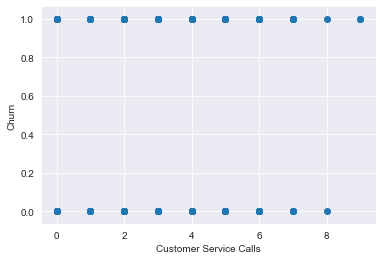

In [7]:
plt.scatter(df.customer_service_calls, df.churn)
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   bool   
 4   voice_mail_plan         3333 non-null   bool   
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [9]:
df.international_plan.replace((True, False), (1, 0), inplace = True)

In [10]:
df.voice_mail_plan.replace((True, False), (1, 0), inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

View a pairplot of all numeric columns:

In [12]:
numeric_cols = df.drop('state', axis = 1)

Check duplicates

In [13]:
df.duplicated().sum()

0

## Correlations

In [14]:
# correlations with churn
df.corr().churn.sort_values(ascending = False)

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
voice_mail_plan          -0.102148
Name: churn, dtype: float64

So the highest correlations with churn are:
- international_plan
- customer_service_calls
- total_day_minutes
- total_day_charge

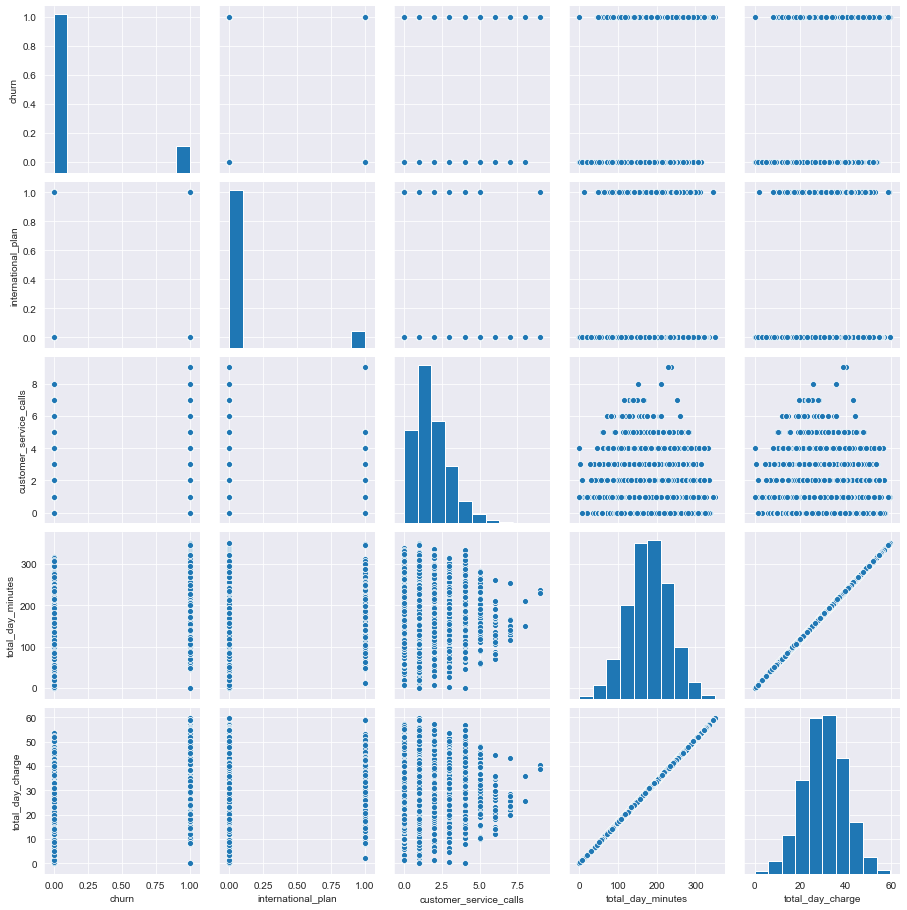

In [15]:
high_corrs = ['churn', 'international_plan', 'customer_service_calls', 'total_day_minutes', 'total_day_charge']
sns.pairplot(df[high_corrs])

It's no surprise that total day minutes and total day charge are extremely linearly related. 

It might be interesting to explore customer service calls and day minutes a bit further.  

Customer service calls and international plan holders might also be an interesting relationship to explore. 

### Investigate:  Customer Service Calls:

In [16]:
df.customer_service_calls.describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer_service_calls, dtype: float64

So a customer makes an average of 1.6 calls to customer service.  It might be interesting to see if there's a relationship between the amount of customer service calls and the number of days their account has been open:

In [17]:
df.groupby(['customer_service_calls']).sum()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn
customer_service_calls,,,,,,,,,,,,,,,,,,
0,70608,304528,83,193,5676,126739.3,70327,21546.13,140107.7,69770,11909.35,140946.9,69354,6342.71,7239.9,3098,1955.11,92
1,120202,514039,112,344,9960,211936.3,119343,36029.75,239056.2,118254,20319.96,236393.6,118679,10637.73,11986.1,5365,3236.91,122
2,75312,331765,62,215,6293,134156.1,75342,22807.02,152042.4,76194,12923.80,152518.0,76987,6863.37,7800.5,3397,2106.54,87
3,43515,189797,38,98,2928,78642.8,42864,13369.41,84952.2,42390,7221.03,86780.0,42472,3905.12,4348.8,1932,1174.33,44
4,17042,72878,21,42,1245,30589.2,16895,5200.25,33543.7,16948,2851.21,33050.7,16130,1487.31,1697.0,714,458.31,76
5,6769,28914,6,17,479,11573.7,6568,1967.59,13073.9,6697,1111.31,12668.3,6450,570.13,698.7,292,188.67,40
6,1984,9658,0,9,284,3322.2,2142,564.78,4335.6,2027,368.54,4448.1,2191,200.17,221.1,73,59.71,14
7,1045,3809,0,2,69,1404.1,793,238.70,1967.8,969,167.26,1818.5,994,81.83,88.2,42,23.81,5
8,167,918,0,1,40,360.6,241,61.30,401.8,215,34.15,390.0,198,17.55,16.3,12,4.40,1


In [18]:
df.groupby(['customer_service_calls']).mean()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn
customer_service_calls,,,,,,,,,,,,,,,,,,
0,101.302726,436.912482,0.119082,0.276901,8.143472,181.835438,100.899570,30.912669,201.015352,100.100430,17.086585,202.219369,99.503587,9.100014,10.387231,4.444763,2.805036,0.131994
1,101.779848,435.257409,0.094835,0.291279,8.433531,179.454953,101.052498,30.507832,202.418459,100.130398,17.205724,200.163929,100.490262,9.007392,10.149111,4.542760,2.740821,0.103302
2,99.225296,437.108037,0.081686,0.283267,8.291173,176.753755,99.264822,30.048775,200.319368,100.387352,17.027404,200.945982,101.432148,9.042648,10.277339,4.475626,2.775415,0.114625
3,101.433566,442.417249,0.088578,0.228438,6.825175,183.316550,99.916084,31.164126,198.023776,98.811189,16.832238,202.284382,99.002331,9.102844,10.137063,4.503497,2.737366,0.102564
4,102.662651,439.024096,0.126506,0.253012,7.500000,184.272289,101.777108,31.326807,202.070482,102.096386,17.175964,199.100602,97.168675,8.959699,10.222892,4.301205,2.760904,0.457831
5,102.560606,438.090909,0.090909,0.257576,7.257576,175.359091,99.515152,29.811970,198.089394,101.469697,16.838030,191.943939,97.727273,8.638333,10.586364,4.424242,2.858636,0.606061
6,90.181818,439.000000,0.000000,0.409091,12.909091,151.009091,97.363636,25.671818,197.072727,92.136364,16.751818,202.186364,99.590909,9.098636,10.050000,3.318182,2.714091,0.636364
7,116.111111,423.222222,0.000000,0.222222,7.666667,156.011111,88.111111,26.522222,218.644444,107.666667,18.584444,202.055556,110.444444,9.092222,9.800000,4.666667,2.645556,0.555556
8,83.500000,459.000000,0.000000,0.500000,20.000000,180.300000,120.500000,30.650000,200.900000,107.500000,17.075000,195.000000,99.000000,8.775000,8.150000,6.000000,2.200000,0.500000


In [19]:
csc_acc_len = df.groupby(['customer_service_calls'])['churn', 'account_length'].mean()
csc_acc_len

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,churn,account_length
customer_service_calls,,
0,0.131994,101.302726
1,0.103302,101.779848
2,0.114625,99.225296
3,0.102564,101.433566
4,0.457831,102.662651
5,0.606061,102.560606
6,0.636364,90.181818
7,0.555556,116.111111
8,0.500000,83.500000


So we can see here that 50% or more customers churn when they make 5 or more customer service calls with 100% churn for 9 calls (but there were only 2 of these so that's expected). 

We can also see that the average account length for people making cusomter service calls is under 100 days.

In [20]:
len(df.state.value_counts())

51

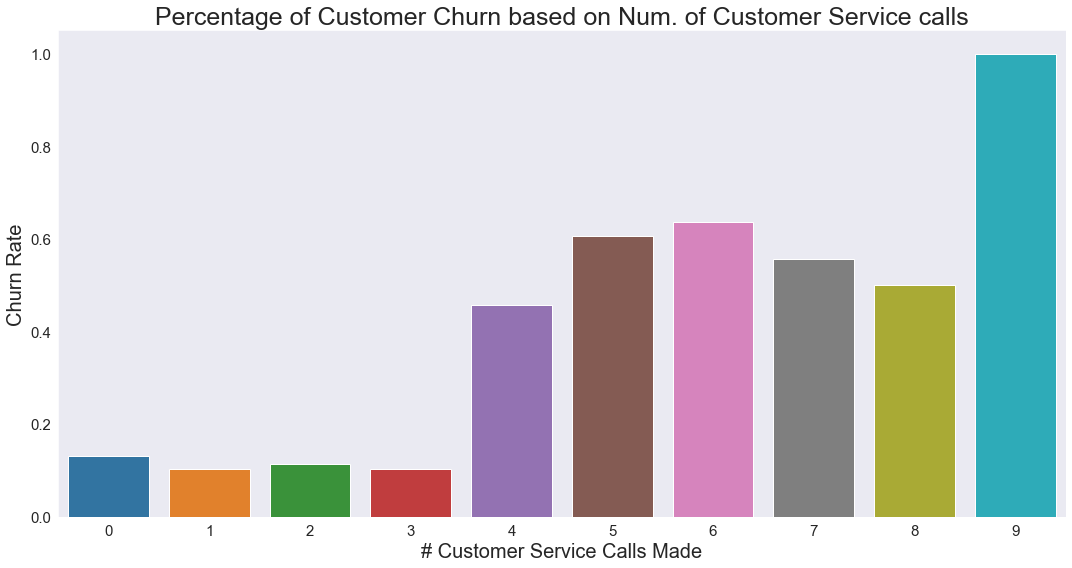

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = csc_acc_len, ax = ax)
plt.title('Percentage of Customer Churn based on Num. of Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('# Customer Service Calls Made', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
plt.savefig('cust_serv_call_churn.png')

### Investigate:  International Plan:

In [22]:
df.international_plan.describe()

count    3333.000000
mean        0.096910
std         0.295879
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: international_plan, dtype: float64

In [23]:
df.groupby(['international_plan']).mean()

,account_length,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
international_plan,,,,,,,,,,,,,,,,,,
0,100.742193,436.508638,0.275748,8.059801,178.893887,100.410963,30.412495,200.663090,100.074419,17.056565,201.350831,100.027907,9.060877,10.195349,4.465449,2.753279,1.573422,0.114950
1,104.071207,443.461300,0.284830,8.464396,187.986997,100.665635,31.958390,203.936842,100.486068,17.334923,196.410217,100.851393,8.838483,10.628173,4.609907,2.869907,1.464396,0.424149


In [24]:
int_plan_churn = df.groupby(['international_plan'])['churn', 'customer_service_calls'].mean()
int_plan_churn

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,churn,customer_service_calls
international_plan,,
0,0.114950,1.573422
1,0.424149,1.464396


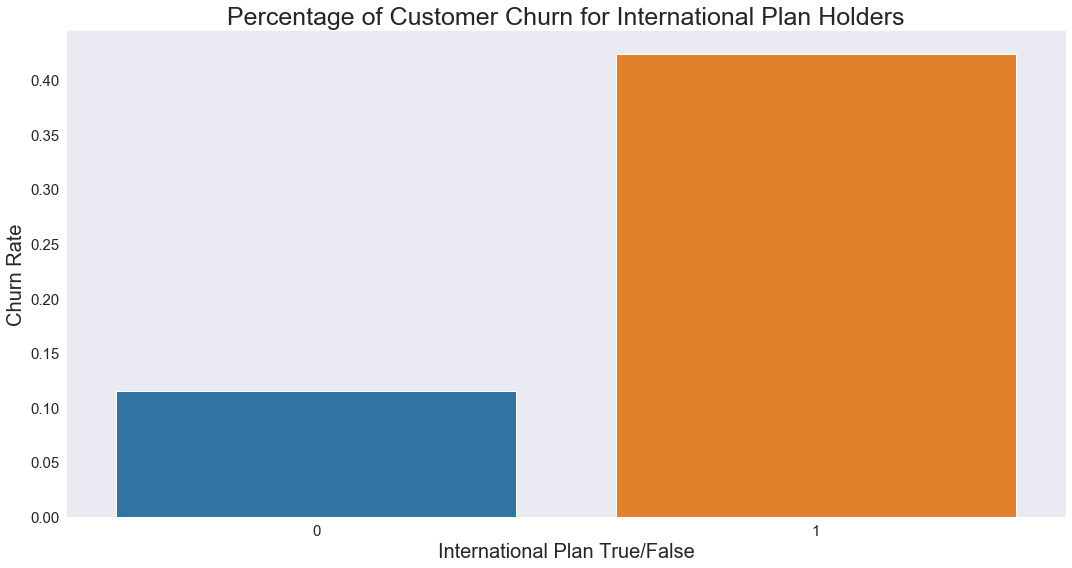

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = int_plan_churn, ax = ax)
plt.title('Percentage of Customer Churn for International Plan Holders', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
plt.savefig('int_plan_churn.png')

### Investigate:  Total Day Minutes:

In [26]:
df.total_day_minutes.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total_day_minutes, dtype: float64

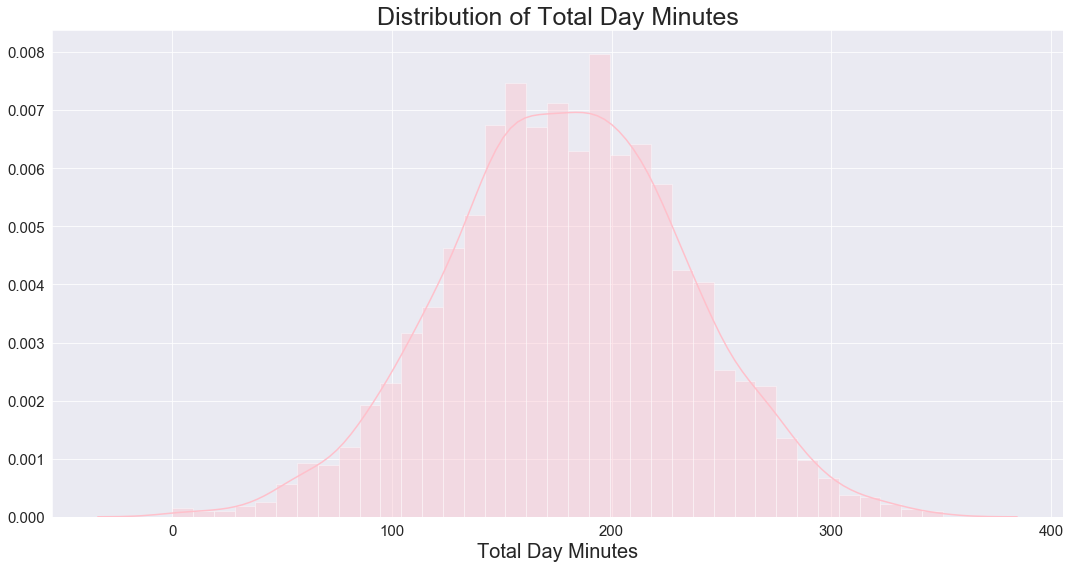

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
sns.distplot(df.total_day_minutes, ax = ax, color = 'pink')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.tight_layout()

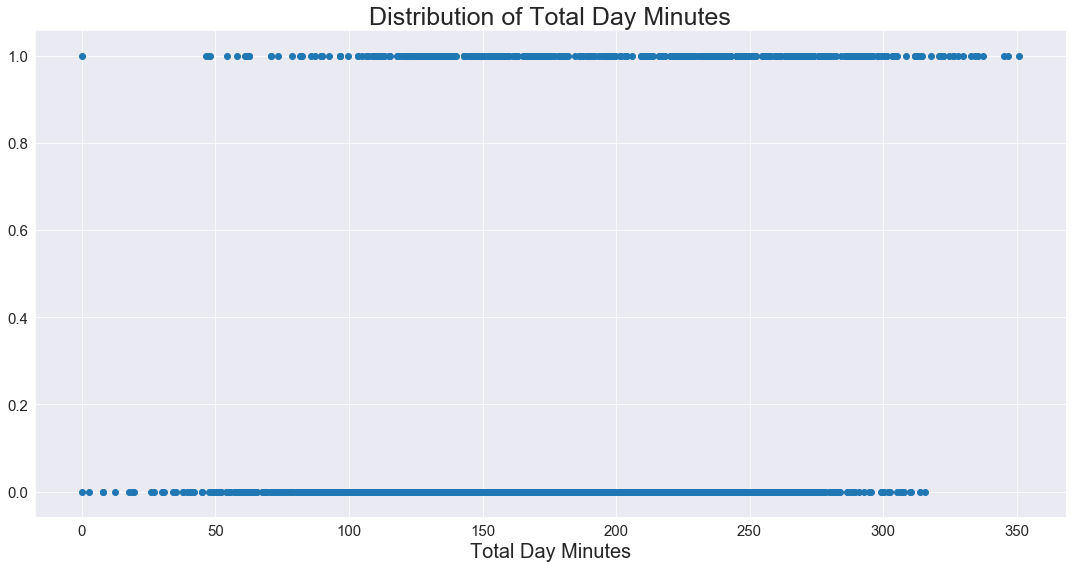

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
plt.scatter(df.total_day_minutes, df.churn)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.tight_layout()


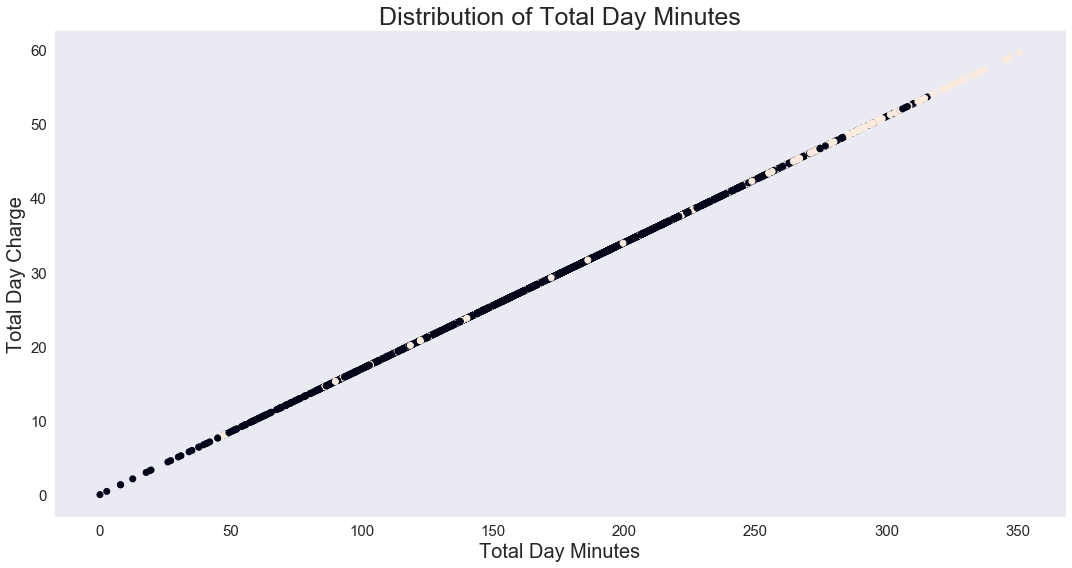

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
plt.scatter(df.total_day_minutes, df.total_day_charge, c = df.churn)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.ylabel('Total Day Charge', fontsize = 20)
plt.tight_layout()
sns.set_style('dark')

In [97]:
df.total_day_charge.describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: total_day_charge, dtype: float64

In [102]:
charge_mins = df.groupby(['total_day_charge'])['churn', 'total_day_minutes'].mean()
charge_mins

,churn,total_day_minutes
total_day_charge,,
0.00,0.5,0.0
0.44,0.0,2.6
1.33,0.0,7.8
1.34,0.0,7.9
2.13,0.0,12.5
...,...,...
57.04,1.0,335.5
57.36,1.0,337.4
58.70,1.0,345.3


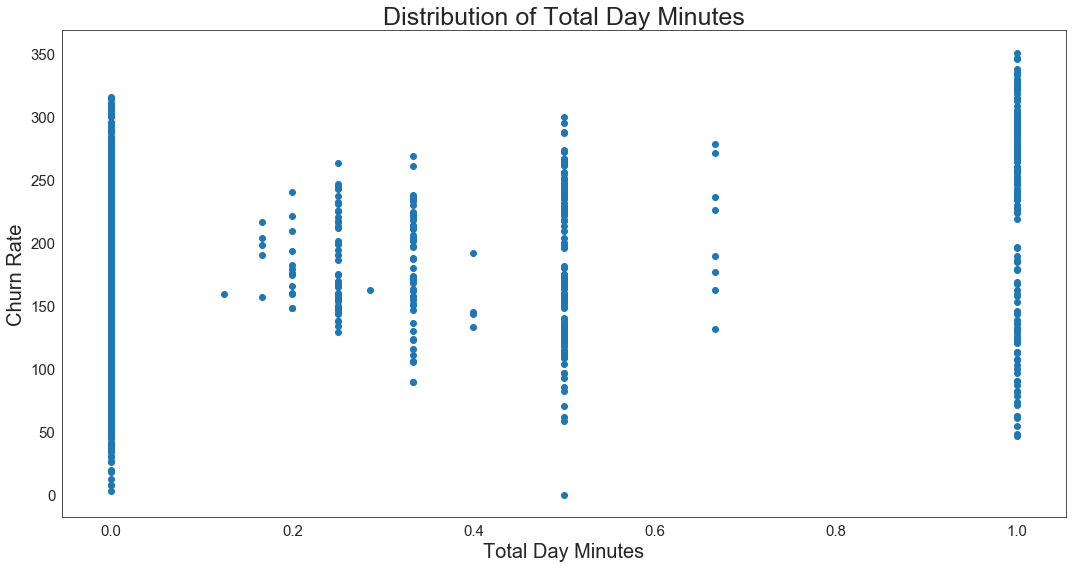

In [106]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
plt.scatter(charge_mins.churn, charge_mins.total_day_minutes)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
sns.set_style('white')

In [107]:
charge_mins = df.groupby(['total_day_minutes'])['churn', 'total_day_minutes'].mean()
charge_mins

,churn,total_day_minutes
total_day_minutes,,
0.0,0.5,0.0
2.6,0.0,2.6
7.8,0.0,7.8
7.9,0.0,7.9
12.5,0.0,12.5
...,...,...
335.5,1.0,335.5
337.4,1.0,337.4
345.3,1.0,345.3


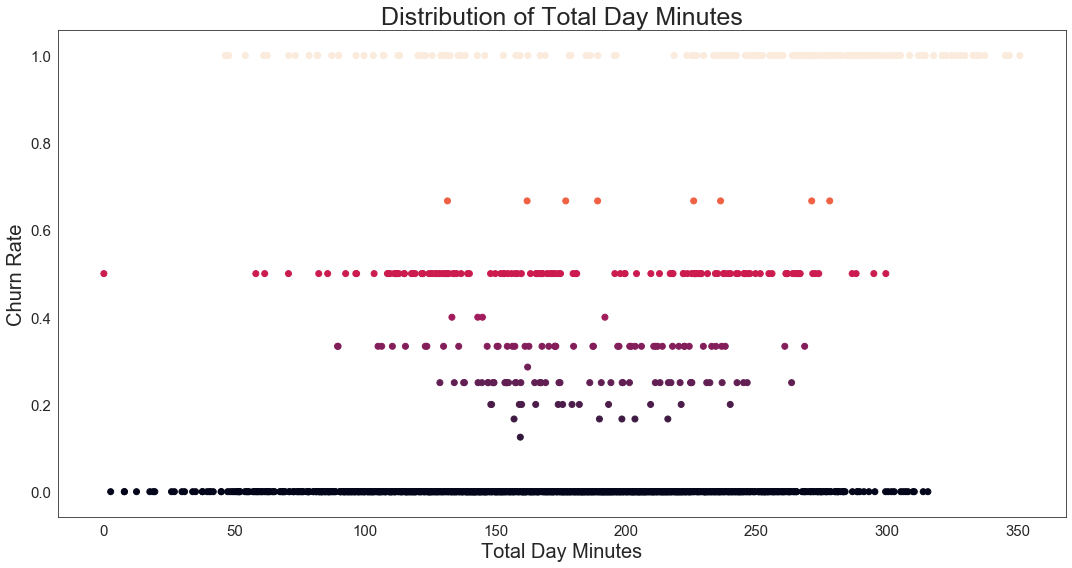

In [110]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
plt.scatter(charge_mins.total_day_minutes, charge_mins.churn, c = charge_mins.churn)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
sns.set_style('white')

This is showing that minutes doesn't really play a big role in churn rate...  The black line shows that people don't churn with minutes between 0 and 320 and then cream line/dots shows people churn with minues 50-350 so... pretty evenly spread...

# Day Summary:

Today I explored some of the feature importances of the data set.  It seems clear that customer service calls and international plan customers are a main driver of churn.  I produced some plots showing this relationship.  

Next I'll move onto focusing on the modeling and dealing with the class imbalance issues as well as looking into regularisation.  I want to do the regularisation that will do the feature selection for me...

changes to commit.... 